This is the code to produce the figures for Section 2.3, where we show that the first step of the artificial AMP converges to the PCA estimate quickly

In [1]:
import numpy as np
from scipy.stats import norm
from scipy import linalg
from scipy.stats import semicircular
from scipy.special import bernoulli  # for setting2
from math import factorial  # for setting2

rng = np.random.default_rng(seed=42)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [3]:
# Normalized Squared Correlation
nsc = lambda x,y: np.dot(x, y) ** 2 / np.linalg.norm(x) ** 2 / np.linalg.norm(y) ** 2

In [36]:
def first_step_amp_mp(alpha, u, W, niter):
    denoiser = lambda x: x/alpha

    n = len(u)
    u*(np.sqrt(n)/np.linalg.norm(u))
    X = alpha / n * np.outer(u, u) + W

    D, V = linalg.eigh(X)
    v0 = V[:, -1]
    u_pca = np.sqrt(n) * v0
    rho_squared = nsc(u, u_pca)
    z = rng.normal(size=n)
    u_init = np.sqrt(rho_squared)*u + np.sqrt(1-rho_squared)*z

    uAMP = dict()
    fAMP = dict()
    scal = dict()

    uAMP[1] = u_init
    scal[1] = nsc(uAMP[1], u_pca)

    fAMP[1] = X@uAMP[1] - 2*uAMP[1]

    uAMP[2] = denoiser(fAMP[1])
    scal[2] = nsc(uAMP[2], u_pca)

    for jj in range(2, niter):
        b = [2*alpha**(-i) for i in range(jj-1, -1, -1)]
        fAMP[jj] = X@uAMP[jj] - np.sum([b[i-1]*uAMP[i] for i in range(1, jj+1)], axis=0)
        uAMP[jj+1] = denoiser(fAMP[jj])
        scal[jj + 1] = nsc(uAMP[jj+1], u_pca)
    return uAMP, scal, u_pca

In [70]:
n = 1000
c = 2
alphas = [3, 3.5, 4]
niter = 8
ntrial = 50

data = {alpha: np.zeros(shape=niter) for alpha in alphas}

for alpha in alphas:
    for trial in range(ntrial):
        u = rng.choice([-1, 1], size=n)
        p = n * c
        A = rng.normal(size=(n,p))
        W = 1/n * (A@A.T)
        _, scal, _ = first_step_amp_mp(alpha, u, W, niter)
        data[alpha] += list(scal.values())
    data[alpha] /= ntrial

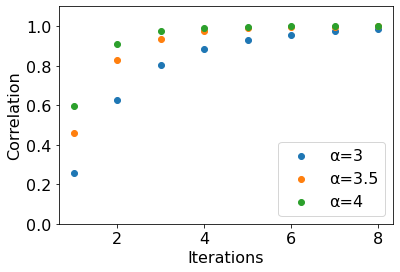

In [71]:
x = np.arange(1, len(data[alpha])+1)
plt.axis([None, None, 0, 1.1])
for alpha in alphas:
    plt.scatter(x, data[alpha], label=f"α={alpha}")
plt.xlabel("Iterations")
plt.ylabel("Correlation")
plt.legend()
plt.savefig("pca_convergence_over_alpha.png", bbox_inches="tight")

In [72]:
ns = [500, 1000, 2000]
c = 2
alpha = 4
niter = 8
ntrial = 50

data = {n: np.zeros(shape=niter) for n in ns}

for n in ns:
    for trial in range(ntrial):
        u = rng.choice([-1, 1], size=n)
        p = n * c
        A = rng.normal(size=(n,p))
        W = 1/n * (A@A.T)
        _, scal, _ = first_step_amp_mp(alpha, u, W, niter)
        data[n] += list(scal.values())
    data[n] /= ntrial

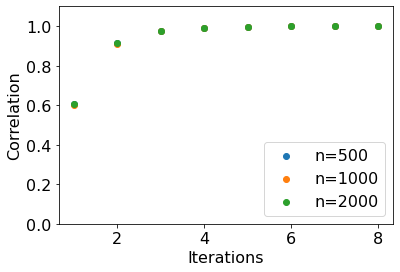

In [73]:
x = np.arange(1, len(data[n])+1)
plt.axis([None, None, 0, 1.1])
for n in ns:
    plt.scatter(x, data[n], label=f"n={n}")
plt.xlabel("Iterations")
plt.ylabel("Correlation")
plt.legend(loc="lower right")
plt.savefig("pca_convergence_over_n.png", bbox_inches="tight")